In [2]:
# Set dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read CSV file
df = pd.read_csv('datasources/yearly_gdp.csv')

# Which sector has the most growth?

In this Jupyter Notebook, we have analyzed the GDP (Gross Domestic Product) data for different sectors over the years. We have calculated the difference between the first and last year's GDP for each sector to determine the sector with the most growth.

The dataframe `df_aux_sorted` contains the sectors along with their first and last year's GDP values, as well as the GDP difference. The dataframe is sorted in descending order based on the GDP difference.

Let's take a look at the sectors and their corresponding GDP differences:

```python
df_aux_sorted
```

Based on the analysis, the sector with the most growth is **Industrias manufactureras** with a GDP difference of **$5,923,841,000,000** mxn.

Please note that this analysis is based on the available data and the assumption that GDP is a measure of growth for each sector.

There are a total of 20 sectors.
The sector with the most growth is Manufacturing with a growth of $5,923,841.00


C:\Users\RicardoGomez\AppData\Local\Temp\ipykernel_2408\220520899.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  growth = float(df_aux_sorted.iloc[0]["GDP Difference"])  # Convert to float using .iloc[0]


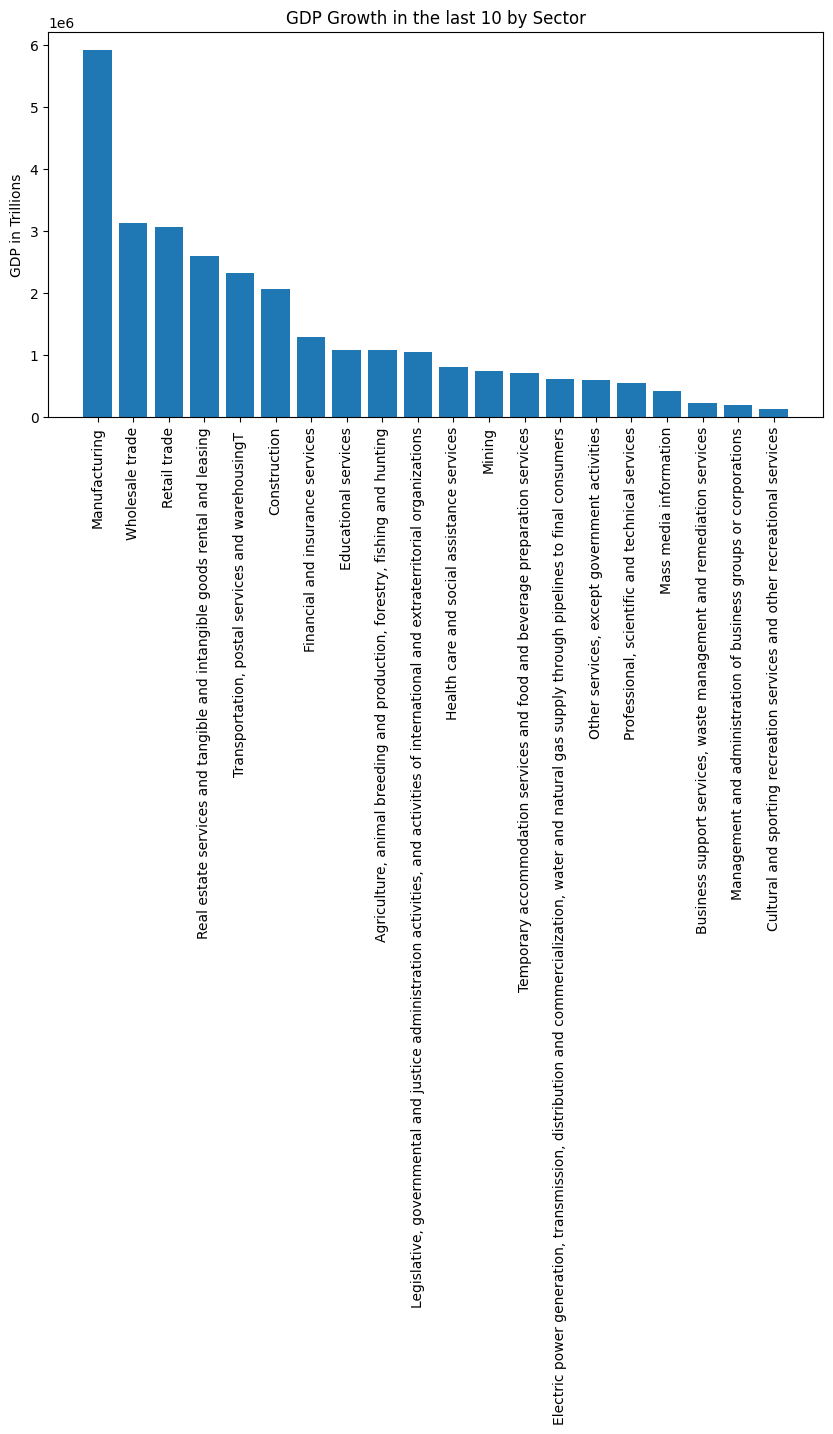

In [3]:
# Get count of unique sectors
print(f'There are a total of {df['Sector'].nunique()} sectors.')

# Sort by Sector and then Year descending
df_sorted = df.sort_values(by=['Sector', 'Year'])

# Group by sector and the gdp of the first year, and the gdp of the last year
df_grouped = df_sorted.groupby(['Sector'])
df_aux = df_grouped.agg({'GDP': ['first', 'last']})

# Have the dataframe have a column for the difference between the last year and the first year
df_aux['GDP Difference'] = df_aux['GDP']['last'] - df_aux['GDP']['first']

# Sort the dataframe by the GDP difference
df_aux_sorted = df_aux.sort_values(by='GDP Difference', ascending=False)

# Print what sector with the most growth
sector = df_aux_sorted.index[0]  # Assuming index represents sector names
growth = float(df_aux_sorted.iloc[0]["GDP Difference"])  # Convert to float using .iloc[0]
print(f'The sector with the most growth is {sector} with a growth of ${growth:,.2f}')

# Plot the data
plt.figure(figsize=(10, 5))
plt.bar(df_aux_sorted.index, df_aux_sorted['GDP Difference'])
plt.xticks(rotation=90)
plt.ylabel('GDP in Trillions')
plt.title('GDP Growth in the last 10 by Sector')
plt.show()



Below another type of graph

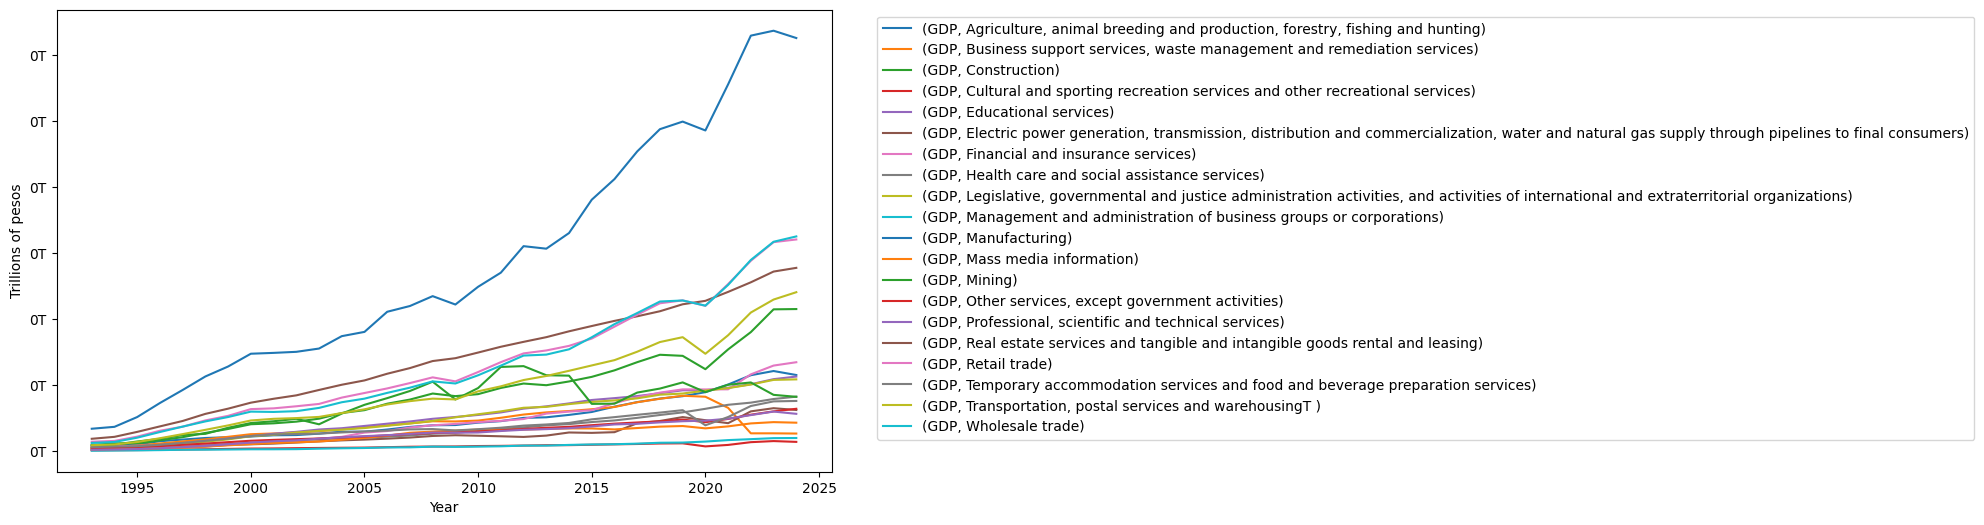

GDP  \
Sector Agriculture, animal breeding and production, forestry, fishing and hunting   
Year                                                                                
1993                                             79188.25                           
1994                                             81539.25                           
1995                                            100801.50                           
1996                                            150412.50                           
1997                                            174868.75                           

                                                                             \
Sector Business support services, waste management and remediation services   
Year                                                                          
1993                                             53051.25                     
1994                                             65023.25                     
1995                                             84520.00                     
1996                                            115744.50                     
1997                                            147046.25                     

                     \
Sector Construction   
Year                  
1993       89880.00   
1994      118033.50   
1995      116553.75   
1996      164629.00   
1997      211514.25   

                                                                                  \
Sector Cultural and sporting recreation services and other recreational services   
Year                                                                               
1993                                             11986.25                          
1994                                             13898.50                          
1995                                             15278.50                          
1996                                             18273.00                          
1997                                             24072.50                          

                             \
Sector Educational services   
Year                          
1993               51212.75   
1994               61798.25   
1995               74717.50   
1996               95301.00   
1997              121768.50   

                                                                                                                                                       \
Sector Electric power generation, transmission, distribution and commercialization, water and natural gas supply through pipelines to final consumers   
Year                                                                                                                                                    
1993                                             20449.75                                                                                               
1994                                             23762.00                                                                                               
1995                                             33723.75                                                                                               
1996                                             47497.00                                                                                               
1997                                             59150.00                                                                                               

                                         \
Sector Financial and insurance services   
Year                                      
1993                           64778.00   
1994                           68247.50   
1995                           83002.00   
1996                           71349.75   
1997                           71721.00   

                                                   \
Sector Health care and social assi

In [4]:
# Read CSV file
rawdata = pd.read_csv('datasources/yearly_gdp.csv')

dict1 = {
    'Sector': rawdata['Sector'],
    'Year': rawdata['Year'],
    'GDP': rawdata['GDP']
}

df = pd.DataFrame(dict1)



df = df.set_index(['Year', 'Sector']).unstack()

ax = df.plot(linestyle='-', figsize=(10, 6))
# Customize y-axis labels to show values in trillions
formatter = plt.FuncFormatter(lambda x, _: f'{x / 1e12:.0f}T')
ax.yaxis.set_major_formatter(formatter)

# Adding labels and legend
plt.ylabel('Trillions of pesos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
df.head()